#Product-Tier Prediction (Classification)

Importing relevant libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from collections import Counter

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interview_Assignments/autoScout24/processed_data.csv')
data.head()

,product_tier,price,search_views,detail_views,stock_days,ctr,zip_code_2,zip_code_3,zip_code_4,zip_code_5,zip_code_6,zip_code_7,zip_code_8,zip_code_9,Volkswagen,Renault,Peugeot,Opel,Ford,Mercedes-Benz,BMW,Volvo,Toyota,Audi,article_age
0,0,0.067030,3091.0,123.0,30,0.037803,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0
1,0,0.143864,3283.0,223.0,52,0.067926,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.0
2,0,0.047821,3247.0,265.0,51,0.081614,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,20.0
3,0,0.007003,1856.0,26.0,101,0.014009,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,15.0
4,0,0.106048,490.0,20.0,12,0.040816,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.0


**Splitting data into independent and dependent variables**

In [5]:
X = data.loc[:, data.columns != 'product_tier']
y = data['product_tier']

#Feature Importance

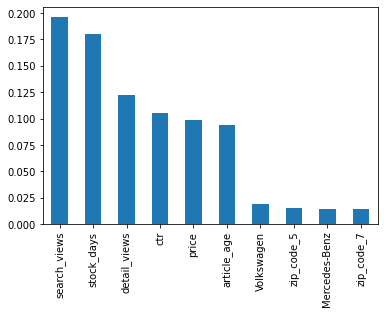

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

important_features = pd.Series(model.feature_importances_, index=X.columns)
important_features.nlargest(10).plot(kind='bar')
plt.show()

**We are considering all the variables for prediction**

In [7]:
# Spliting into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [10]:
Counter(y_train)

Counter({0: 52779, 1: 1620, 2: 408})

**Handling Imbalance Datasets**

Since there is huge imbalance of product-tier categories, so we are going to use below techniques to handle imbalance

1. SMOTE Oversampling
2. Class Weight technique

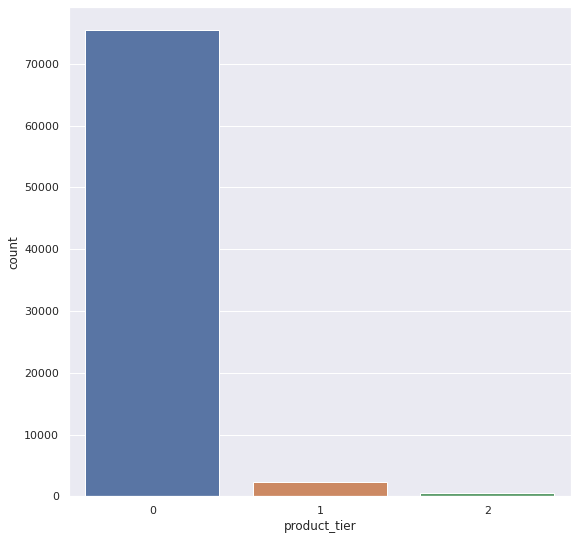

In [11]:
plt.figure(figsize=(9,9))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="product_tier", data=data)

#Oversampling with SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
# transform the dataset
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 52779, 1: 1620, 2: 408})
The number of classes after fit Counter({0: 52779, 1: 52779, 2: 52779})


**Classification with Logistic regression**

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [16]:
log_classifier = LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [17]:
clf = GridSearchCV(log_classifier, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train_ns, y_train_ns)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

0.8481481481481481
Confusion matrix, without normalization


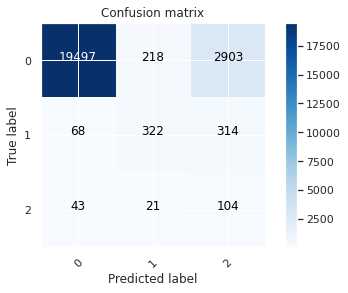

In [19]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['0', '1', '2'])

In [20]:
target_names = ['0', '1', '2']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     22618
           1       0.57      0.46      0.51       704
           2       0.03      0.62      0.06       168

    accuracy                           0.85     23490
   macro avg       0.53      0.65      0.50     23490
weighted avg       0.97      0.85      0.90     23490



**Random Forest Classifier**

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rfclassifier = RandomForestClassifier()

Hypertuning and training of Random Forest Classifier

In [36]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rfclassifier, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train_ns, y_train_ns)

0.9703277990634313
Confusion matrix, without normalization


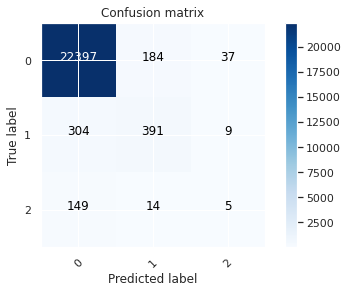

In [24]:
y_pred = rf_random.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['0', '1', '2'])

In [25]:
target_names = ['0', '1', '2']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     22618
           1       0.66      0.56      0.60       704
           2       0.10      0.03      0.05       168

    accuracy                           0.97     23490
   macro avg       0.58      0.53      0.55     23490
weighted avg       0.96      0.97      0.97     23490



#Class weight technique with Logistic Regression

In [30]:
log_classifier = LogisticRegression(class_weight={0:1,1:30,2:60 })
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [31]:
clf = GridSearchCV(log_classifier, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0,
                                          class_weight={0: 1, 1: 30, 2: 60},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_ma

0.9224350787569179
Confusion matrix, without normalization


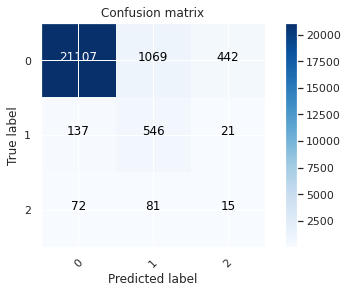

In [32]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['0', '1', '2'])

In [33]:
target_names = ['0', '1', '2']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     22618
           1       0.32      0.78      0.45       704
           2       0.03      0.09      0.05       168

    accuracy                           0.92     23490
   macro avg       0.45      0.60      0.49     23490
weighted avg       0.96      0.92      0.94     23490

